In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [5]:
dfe = df.copy()

dfe['sex'] = enc.fit_transform(df['sex'])
dfe['smoker'] = enc.fit_transform(df['smoker'])
dfe['region'] = enc.fit_transform(df['region'])

In [6]:
dfe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dfe.drop('charges', axis=1), dfe['charges'],\
                                                    test_size=0.2, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.layers import Dense

In [26]:
from sklearn.metrics import r2_score

In [134]:
def check_min_max(y_pred):
    print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred), np.min(y_pred)))
    print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

In [12]:
# starting from where we left off in the last notebook 
# starting from model 11, again 

In [31]:
# for reference model 10 had following arch:
# 17 layers
# starting from 200 neurons
# gradually decreasing to 100, 50, 25, 10, 5 and then 1

# r2 score of 0.8748217357088579

# Predicted values range
# max: 53633.48046875
# min: 1184.1253662109375

In [13]:
# just changing the epocs from 500 to 200 

In [22]:
# param count: 1,256,501
model11 = Sequential()

model11.add(Dense(500, input_dim=6, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(500, activation='relu'))
model11.add(Dense(1, activation='relu'))


model11.compile(loss='mae', optimizer='adam',
             metrics=['mse', 'mae'])

In [23]:
history11 = model11.fit(X_train, y_train, batch_size=64, epochs=200, verbose=1, validation_split=0.2)

Epoch 1/200
14/14 [==============================] - 1s 95ms/step - loss: 12124.5957 - mse: 288543360.0000 - mae: 12124.5957 - val_loss: 8666.9131 - val_mse: 130904264.0000 - val_mae: 8666.9131
Epoch 2/200
14/14 [==============================] - 1s 54ms/step - loss: 8120.6094 - mse: 157477568.0000 - mae: 8120.6094 - val_loss: 7336.8994 - val_mse: 139617664.0000 - val_mae: 7336.8994
Epoch 3/200
14/14 [==============================] - 1s 59ms/step - loss: 7402.9380 - mse: 157085072.0000 - mae: 7402.9380 - val_loss: 6629.9795 - val_mse: 156089088.0000 - val_mae: 6629.9795
Epoch 4/200
14/14 [==============================] - 1s 57ms/step - loss: 7140.4038 - mse: 163705648.0000 - mae: 7140.4038 - val_loss: 6364.8604 - val_mse: 161434640.0000 - val_mae: 6364.8604
Epoch 5/200
14/14 [==============================] - 1s 58ms/step - loss: 6910.0410 - mse: 165194688.0000 - mae: 6910.0410 - val_loss: 6252.7061 - val_mse: 164847344.0000 - val_mae: 6252.7061
Epoch 6/200
14/14 [===================

Epoch 44/200
14/14 [==============================] - 1s 43ms/step - loss: 3261.5876 - mse: 40182460.0000 - mae: 3261.5876 - val_loss: 2762.2312 - val_mse: 31474710.0000 - val_mae: 2762.2312
Epoch 45/200
14/14 [==============================] - 1s 40ms/step - loss: 3279.8435 - mse: 40944832.0000 - mae: 3279.8435 - val_loss: 2938.0449 - val_mse: 30781598.0000 - val_mae: 2938.0449
Epoch 46/200
14/14 [==============================] - 1s 42ms/step - loss: 3192.4893 - mse: 40216216.0000 - mae: 3192.4893 - val_loss: 2791.7544 - val_mse: 30894230.0000 - val_mae: 2791.7544
Epoch 47/200
14/14 [==============================] - 1s 44ms/step - loss: 3033.3342 - mse: 39533300.0000 - mae: 3033.3342 - val_loss: 2632.6116 - val_mse: 31244032.0000 - val_mae: 2632.6116
Epoch 48/200
14/14 [==============================] - 1s 42ms/step - loss: 3263.0962 - mse: 39739604.0000 - mae: 3263.0962 - val_loss: 2929.0417 - val_mse: 35092648.0000 - val_mae: 2929.0417
Epoch 49/200
14/14 [=========================

Epoch 87/200
14/14 [==============================] - 1s 40ms/step - loss: 2340.5078 - mse: 28311586.0000 - mae: 2340.5078 - val_loss: 2035.5020 - val_mse: 23756412.0000 - val_mae: 2035.5020
Epoch 88/200
14/14 [==============================] - 1s 41ms/step - loss: 2266.6516 - mse: 27089904.0000 - mae: 2266.6516 - val_loss: 1930.9054 - val_mse: 22480632.0000 - val_mae: 1930.9054
Epoch 89/200
14/14 [==============================] - 1s 39ms/step - loss: 2169.3984 - mse: 26271074.0000 - mae: 2169.3984 - val_loss: 2004.1597 - val_mse: 23721838.0000 - val_mae: 2004.1597
Epoch 90/200
14/14 [==============================] - 1s 42ms/step - loss: 2276.0830 - mse: 28195438.0000 - mae: 2276.0830 - val_loss: 2229.9263 - val_mse: 23269596.0000 - val_mae: 2229.9263
Epoch 91/200
14/14 [==============================] - 1s 40ms/step - loss: 2340.0071 - mse: 27358582.0000 - mae: 2340.0071 - val_loss: 2016.1166 - val_mse: 23500098.0000 - val_mae: 2016.1166
Epoch 92/200
14/14 [=========================

Epoch 130/200
14/14 [==============================] - 1s 43ms/step - loss: 2255.0750 - mse: 25317682.0000 - mae: 2255.0750 - val_loss: 1997.0315 - val_mse: 21486032.0000 - val_mae: 1997.0315
Epoch 131/200
14/14 [==============================] - 1s 52ms/step - loss: 2164.9905 - mse: 24441492.0000 - mae: 2164.9905 - val_loss: 1929.0463 - val_mse: 20956244.0000 - val_mae: 1929.0463
Epoch 132/200
14/14 [==============================] - 1s 41ms/step - loss: 2106.6274 - mse: 24761628.0000 - mae: 2106.6274 - val_loss: 2006.2708 - val_mse: 23866016.0000 - val_mae: 2006.2708
Epoch 133/200
14/14 [==============================] - 1s 44ms/step - loss: 2004.5734 - mse: 24350614.0000 - mae: 2004.5734 - val_loss: 2054.8215 - val_mse: 22103232.0000 - val_mae: 2054.8215
Epoch 134/200
14/14 [==============================] - 1s 42ms/step - loss: 2047.5388 - mse: 24397912.0000 - mae: 2047.5388 - val_loss: 2013.3324 - val_mse: 23100390.0000 - val_mae: 2013.3324
Epoch 135/200
14/14 [===================

Epoch 173/200
14/14 [==============================] - 1s 40ms/step - loss: 2032.5009 - mse: 24261096.0000 - mae: 2032.5009 - val_loss: 2072.2683 - val_mse: 23778462.0000 - val_mae: 2072.2683
Epoch 174/200
14/14 [==============================] - 1s 39ms/step - loss: 1926.4456 - mse: 23752704.0000 - mae: 1926.4456 - val_loss: 1924.2783 - val_mse: 23304058.0000 - val_mae: 1924.2783
Epoch 175/200
14/14 [==============================] - 1s 44ms/step - loss: 1865.7426 - mse: 23620842.0000 - mae: 1865.7426 - val_loss: 1771.7860 - val_mse: 20564594.0000 - val_mae: 1771.7860
Epoch 176/200
14/14 [==============================] - 1s 39ms/step - loss: 1833.3442 - mse: 23365396.0000 - mae: 1833.3442 - val_loss: 1689.4011 - val_mse: 21731914.0000 - val_mae: 1689.4011
Epoch 177/200
14/14 [==============================] - 1s 41ms/step - loss: 1880.2859 - mse: 23990468.0000 - mae: 1880.2859 - val_loss: 1871.5529 - val_mse: 22466308.0000 - val_mae: 1871.5529
Epoch 178/200
14/14 [===================

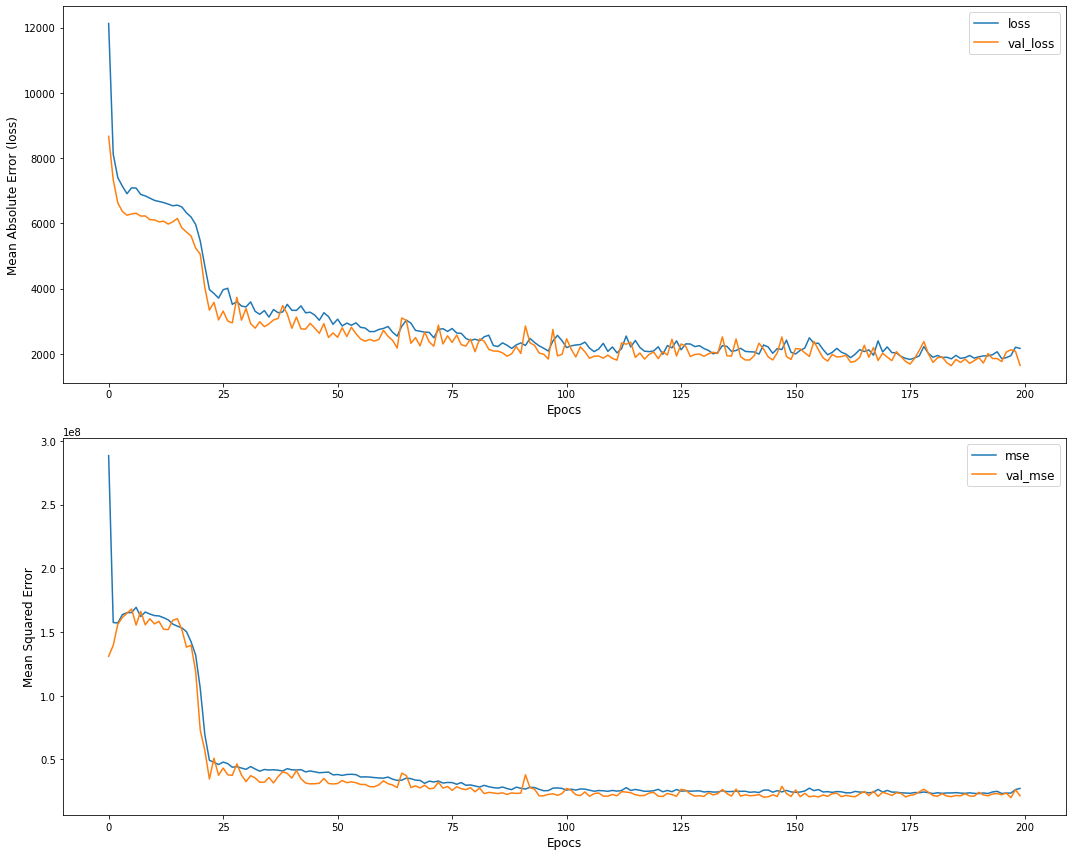

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history11.history['loss'], label='loss')
axs[0].plot(history11.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history11.history['mse'], label='mse')
axs[1].plot(history11.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [27]:
y_pred11 = model11.predict(X_test)
r2_score(y_test, y_pred11) 

0.8737026356602756

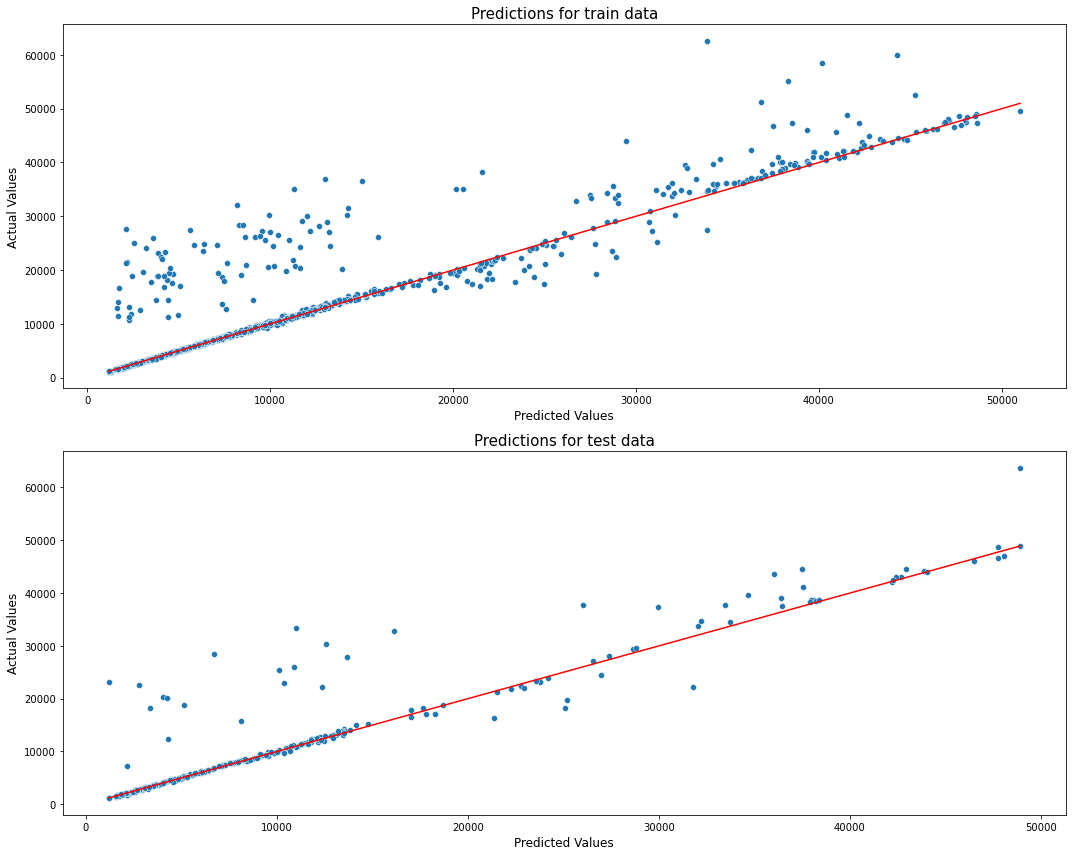

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model11.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model11.predict(X_train).reshape(-1), model11.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred11.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred11.reshape(-1), y_pred11.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [135]:
check_min_max(y_pred11)

Predicted values

max: 48903.9765625
min: 1183.911865234375

Actual values

max: 63770.42801
min: 1131.5066


In [32]:
# r2 score barely moved when compared to model 10
# but max value dropped to 48.9k

In [36]:
# I've been using the MAE as the loss parameter till now
# let's try the model 10 arch with the loss as MSE 
# I'm keeping the epocs at 200 for now
# might increase it depending on the results though

In [55]:
# I think I should be using callbacks for early stopping
# PS waiting is boring :/ 

In [45]:
from tensorflow.keras.callbacks import EarlyStopping 

In [49]:
model12 = Sequential()

model12.add(Dense(200, input_dim=6, activation='relu'))
model12.add(Dense(200, activation='relu'))
model12.add(Dense(200, activation='relu'))
model12.add(Dense(200, activation='relu'))
model12.add(Dense(100, activation='relu'))
model12.add(Dense(100, activation='relu'))
model12.add(Dense(100, activation='relu'))
model12.add(Dense(100, activation='relu'))
model12.add(Dense(100, activation='relu'))
model12.add(Dense(50, activation='relu'))
model12.add(Dense(50, activation='relu'))
model12.add(Dense(25, activation='relu'))
model12.add(Dense(25, activation='relu'))
model12.add(Dense(10, activation='relu'))
model12.add(Dense(10, activation='relu'))
model12.add(Dense(5, activation='relu'))
model12.add(Dense(1, activation='relu'))

model12.compile(loss='mse', optimizer='adam',
             metrics=['mse', 'mae'])

In [54]:
history12 = model12.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 0s 22ms/step - loss: 325472448.0000 - mse: 325472448.0000 - mae: 13518.7178 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 2/300
14/14 [==============================] - 0s 20ms/step - loss: 325472448.0000 - mse: 325472448.0000 - mae: 13518.7188 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 3/300
14/14 [==============================] - 0s 21ms/step - loss: 325472448.0000 - mse: 325472448.0000 - mae: 13518.7188 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 4/300
14/14 [==============================] - 0s 25ms/step - loss: 325472480.0000 - mse: 325472480.0000 - mae: 13518.7178 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 5/300
14/14 [==============================] - 0s 23ms/step - loss: 325472480.0000 - mse: 325472480.0000 - mae: 13518.7158 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - 

In [56]:
# model refuses to train (tried multiple times)
# not a new issue, this was occuring before as well
# I just reran the cell until it starts learning
# that makes me think that it is getting stuck in the local minima
# either I can increase the learning rate, 
# or initialize the weights 
# I'm going to try the initialization first as I think that would be more helpful

In [83]:
model12 = Sequential()

model12.add(Dense(200, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(10, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(10, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(5, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model12.compile(loss='mse', optimizer='adam',
             metrics=['mse', 'mae'])

In [86]:
history12 = model12.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 0s 25ms/step - loss: 325472480.0000 - mse: 325472480.0000 - mae: 13518.7178 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 2/300
14/14 [==============================] - 0s 22ms/step - loss: 325472448.0000 - mse: 325472448.0000 - mae: 13518.7158 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 3/300
14/14 [==============================] - 0s 23ms/step - loss: 325472416.0000 - mse: 325472416.0000 - mae: 13518.7178 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 4/300
14/14 [==============================] - 0s 26ms/step - loss: 325472480.0000 - mse: 325472480.0000 - mae: 13518.7188 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 5/300
14/14 [==============================] - 0s 25ms/step - loss: 325472480.0000 - mse: 325472480.0000 - mae: 13518.7178 - val_loss: 310368800.0000 - val_mse: 310368800.0000 - 

In [88]:
# model still not learning
# lets try changing the learning rate

In [89]:
from tensorflow.keras.optimizers import Adam

In [90]:
model12 = Sequential()

model12.add(Dense(200, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(10, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(10, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(5, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model12.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model12.compile(loss='mse', optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [91]:
history12 = model12.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 2s 130ms/step - loss: 325472256.0000 - mse: 325472256.0000 - mae: 13518.7100 - val_loss: 310368416.0000 - val_mse: 310368416.0000 - val_mae: 12655.5635
Epoch 2/300
14/14 [==============================] - 0s 29ms/step - loss: 325471104.0000 - mse: 325471104.0000 - mae: 13518.6709 - val_loss: 310360448.0000 - val_mse: 310360448.0000 - val_mae: 12655.2734
Epoch 3/300
14/14 [==============================] - 0s 30ms/step - loss: 324925888.0000 - mse: 324925888.0000 - mae: 13500.1445 - val_loss: 305698880.0000 - val_mse: 305698880.0000 - val_mae: 12485.0078
Epoch 4/300
14/14 [==============================] - 0s 21ms/step - loss: 235531104.0000 - mse: 235531104.0000 - mae: 11148.1191 - val_loss: 164028912.0000 - val_mse: 164028912.0000 - val_mae: 11710.4766
Epoch 5/300
14/14 [==============================] - 0s 25ms/step - loss: 137179920.0000 - mse: 137179920.0000 - mae: 8541.4102 - val_loss: 137409360.0000 - val_mse: 137409360.0000 - 

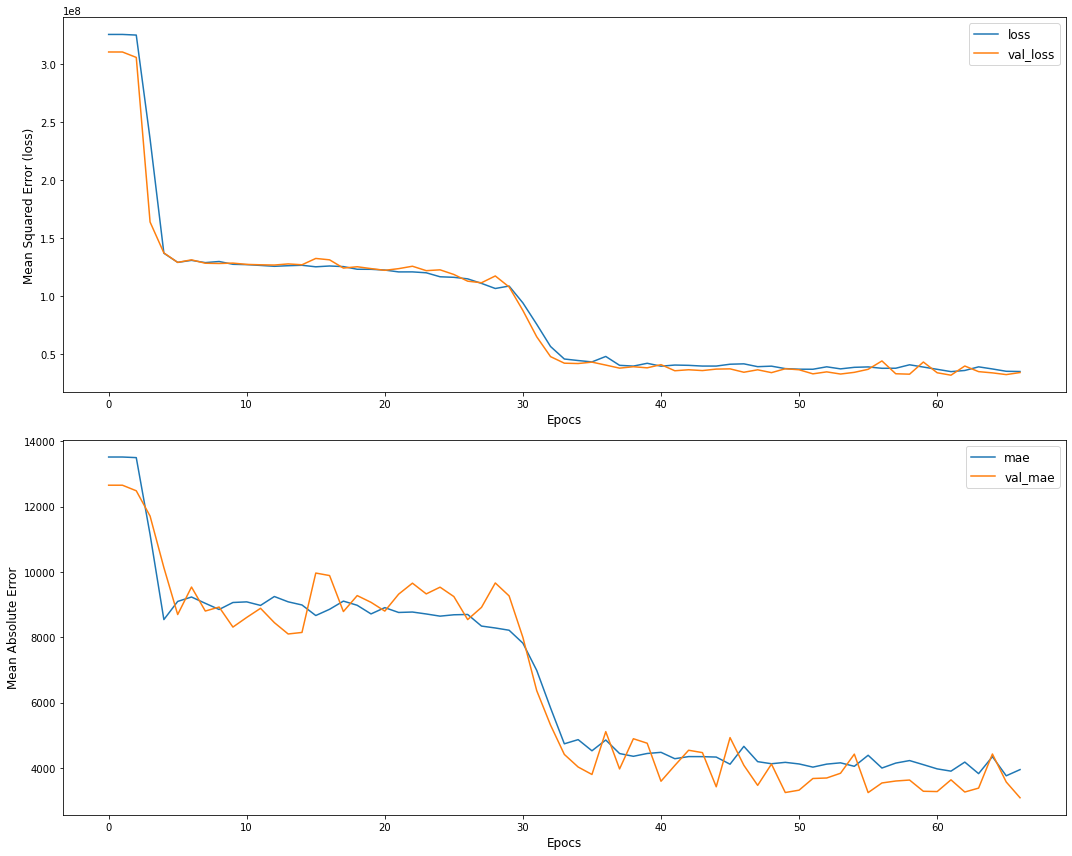

In [189]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history12.history['loss'], label='loss')
axs[0].plot(history12.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Squared Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history12.history['mae'], label='mae')
axs[1].plot(history12.history['val_mae'], label='val_mae')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [94]:
y_pred12 = model12.predict(X_test)
r2_score(y_test, y_pred12) 

0.7934499009302227

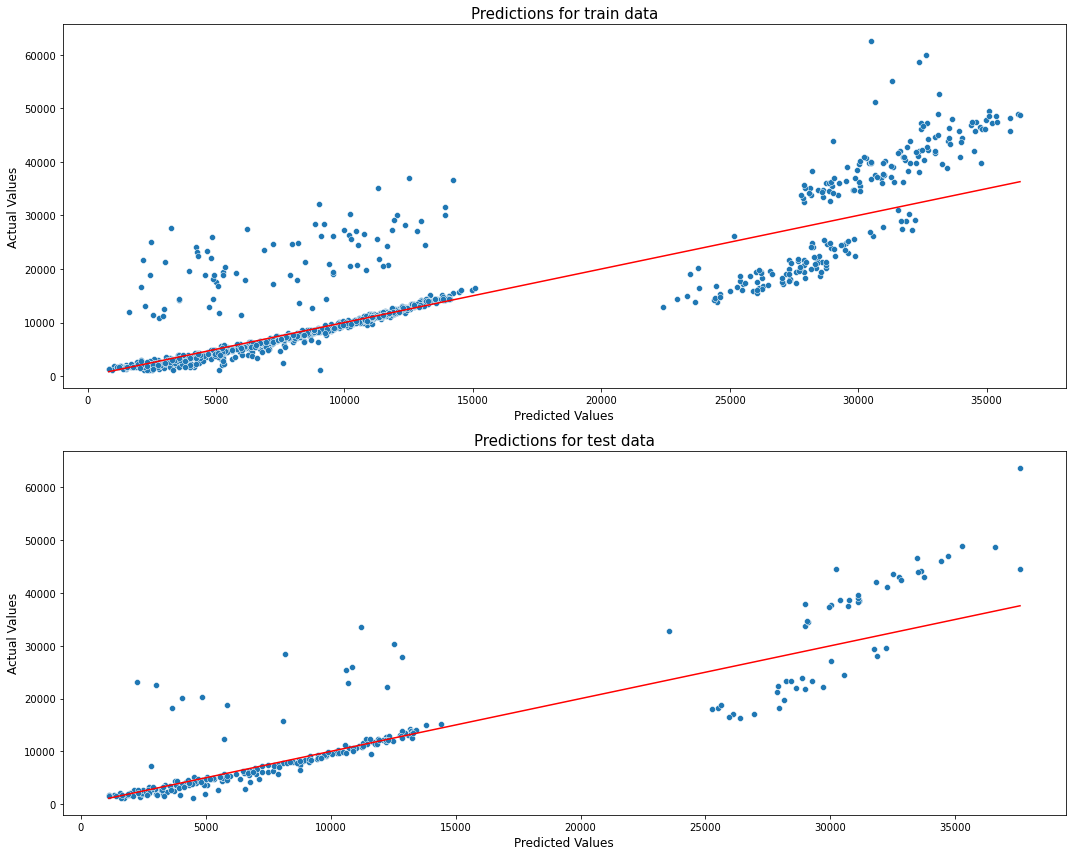

In [96]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model12.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model12.predict(X_train).reshape(-1), model12.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred12.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred12.reshape(-1), y_pred12.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [136]:
check_min_max(y_pred12)

Predicted values

max: 37584.58984375
min: 1119.800048828125

Actual values

max: 63770.42801
min: 1131.5066


In [245]:
# r2 has decreased, and the max predicted value has decreased to 37k
# I want to try the same model without weight initialization 

In [124]:
model13 = Sequential()

model13.add(Dense(200, input_dim=6, activation='relu'))
model13.add(Dense(200, activation='relu'))
model13.add(Dense(200, activation='relu'))
model13.add(Dense(200, activation='relu'))
model13.add(Dense(100, activation='relu'))
model13.add(Dense(100, activation='relu'))
model13.add(Dense(100, activation='relu'))
model13.add(Dense(100, activation='relu'))
model13.add(Dense(100, activation='relu'))
model13.add(Dense(50, activation='relu'))
model13.add(Dense(50, activation='relu'))
model13.add(Dense(25, activation='relu'))
model13.add(Dense(25, activation='relu'))
model13.add(Dense(10, activation='relu'))
model13.add(Dense(10, activation='relu'))
model13.add(Dense(5, activation='relu'))
model13.add(Dense(1, activation='relu'))

model13.compile(loss='mse', optimizer=Adam(0.0001),
             metrics=['mse', 'mae'])

In [120]:
# had to decrease the learning rate for the model to learn 

In [115]:
history13 = model13.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 80ms/step - loss: 325470816.0000 - mse: 325470816.0000 - mae: 13518.6611 - val_loss: 310365728.0000 - val_mse: 310365728.0000 - val_mae: 12655.4658
Epoch 2/300
14/14 [==============================] - 0s 23ms/step - loss: 325466464.0000 - mse: 325466464.0000 - mae: 13518.5098 - val_loss: 310358080.0000 - val_mse: 310358080.0000 - val_mae: 12655.1885
Epoch 3/300
14/14 [==============================] - 0s 21ms/step - loss: 325451232.0000 - mse: 325451232.0000 - mae: 13517.9941 - val_loss: 310331808.0000 - val_mse: 310331808.0000 - val_mae: 12654.2344
Epoch 4/300
14/14 [==============================] - 0s 26ms/step - loss: 325399488.0000 - mse: 325399488.0000 - mae: 13516.2070 - val_loss: 310239680.0000 - val_mse: 310239680.0000 - val_mae: 12650.8906
Epoch 5/300
14/14 [==============================] - 0s 23ms/step - loss: 325220192.0000 - mse: 325220192.0000 - mae: 13509.9395 - val_loss: 309915328.0000 - val_mse: 309915328.0000 - 

14/14 [==============================] - 0s 19ms/step - loss: 125607024.0000 - mse: 125607024.0000 - mae: 9005.9619 - val_loss: 128324752.0000 - val_mse: 128324752.0000 - val_mae: 9106.8145
Epoch 82/300
14/14 [==============================] - 0s 19ms/step - loss: 125527832.0000 - mse: 125527832.0000 - mae: 9204.3369 - val_loss: 127954472.0000 - val_mse: 127954472.0000 - val_mae: 8989.4463
Epoch 83/300
14/14 [==============================] - 0s 17ms/step - loss: 125473024.0000 - mse: 125473024.0000 - mae: 8941.6680 - val_loss: 127669104.0000 - val_mse: 127669104.0000 - val_mae: 8815.2012
Epoch 84/300
14/14 [==============================] - 0s 18ms/step - loss: 125590080.0000 - mse: 125590080.0000 - mae: 9098.6279 - val_loss: 127964344.0000 - val_mse: 127964344.0000 - val_mae: 9028.7031
Epoch 85/300
14/14 [==============================] - 0s 18ms/step - loss: 125312848.0000 - mse: 125312848.0000 - mae: 9001.3652 - val_loss: 127671864.0000 - val_mse: 127671864.0000 - val_mae: 8908.173

14/14 [==============================] - 0s 27ms/step - loss: 110722376.0000 - mse: 110722376.0000 - mae: 8463.1719 - val_loss: 115808784.0000 - val_mse: 115808784.0000 - val_mae: 8740.7139
Epoch 162/300
14/14 [==============================] - 0s 28ms/step - loss: 109986176.0000 - mse: 109986176.0000 - mae: 8644.8633 - val_loss: 114168424.0000 - val_mse: 114168424.0000 - val_mae: 8342.3232
Epoch 163/300
14/14 [==============================] - 0s 26ms/step - loss: 109232840.0000 - mse: 109232840.0000 - mae: 8412.0205 - val_loss: 113643952.0000 - val_mse: 113643952.0000 - val_mae: 8552.5928
Epoch 164/300
14/14 [==============================] - 0s 25ms/step - loss: 107544536.0000 - mse: 107544536.0000 - mae: 8285.7900 - val_loss: 112248768.0000 - val_mse: 112248768.0000 - val_mae: 8367.0020
Epoch 165/300
14/14 [==============================] - 0s 29ms/step - loss: 106450248.0000 - mse: 106450248.0000 - mae: 8267.5244 - val_loss: 111015536.0000 - val_mse: 111015536.0000 - val_mae: 8311

Epoch 202/300
14/14 [==============================] - 0s 21ms/step - loss: 39095404.0000 - mse: 39095404.0000 - mae: 4256.9243 - val_loss: 39193732.0000 - val_mse: 39193732.0000 - val_mae: 3811.3423
Epoch 203/300
14/14 [==============================] - 0s 19ms/step - loss: 39611464.0000 - mse: 39611464.0000 - mae: 4300.5347 - val_loss: 39739240.0000 - val_mse: 39739240.0000 - val_mae: 3776.0024
Epoch 204/300
14/14 [==============================] - 0s 21ms/step - loss: 39675396.0000 - mse: 39675396.0000 - mae: 4346.8848 - val_loss: 40521288.0000 - val_mse: 40521288.0000 - val_mae: 3663.2192
Epoch 205/300
14/14 [==============================] - 0s 20ms/step - loss: 38992708.0000 - mse: 38992708.0000 - mae: 4378.5332 - val_loss: 38939888.0000 - val_mse: 38939888.0000 - val_mae: 3880.2273


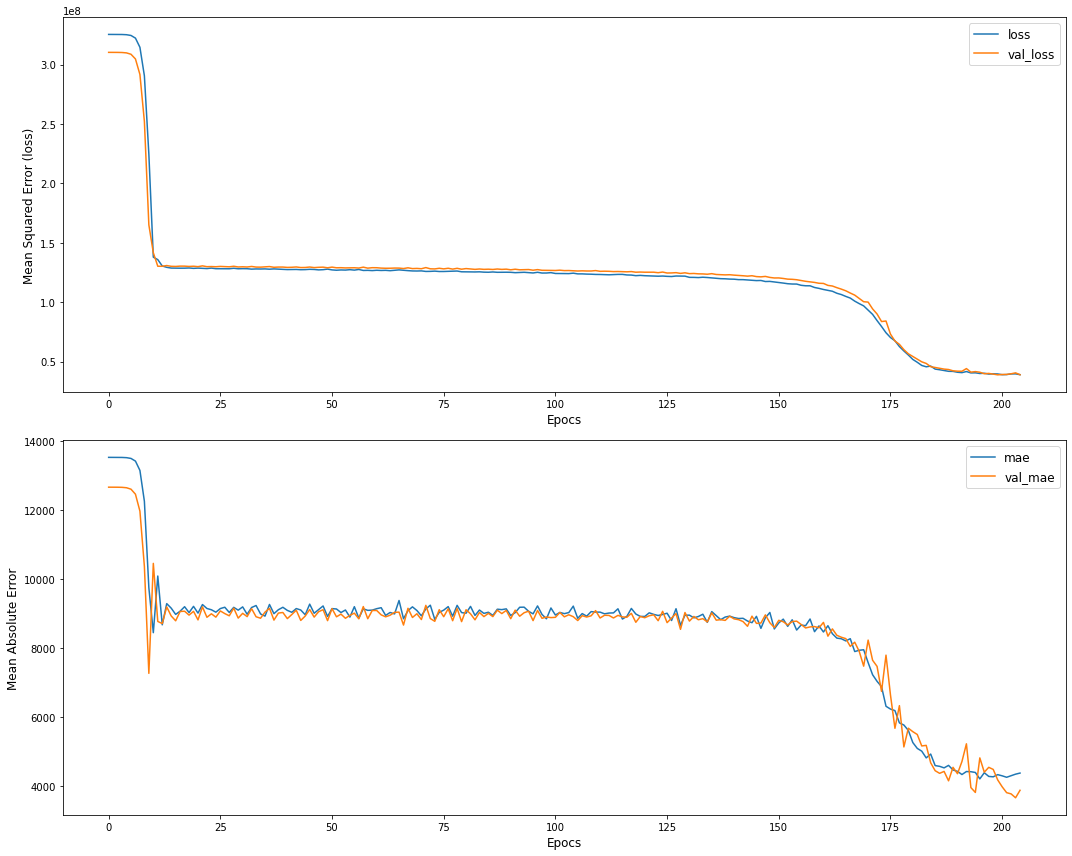

In [190]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history13.history['loss'], label='loss')
axs[0].plot(history13.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Squared Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history13.history['mae'], label='mae')
axs[1].plot(history13.history['val_mae'], label='val_mae')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [117]:
y_pred13 = model13.predict(X_test)
r2_score(y_test, y_pred13) 

0.7727679968209452

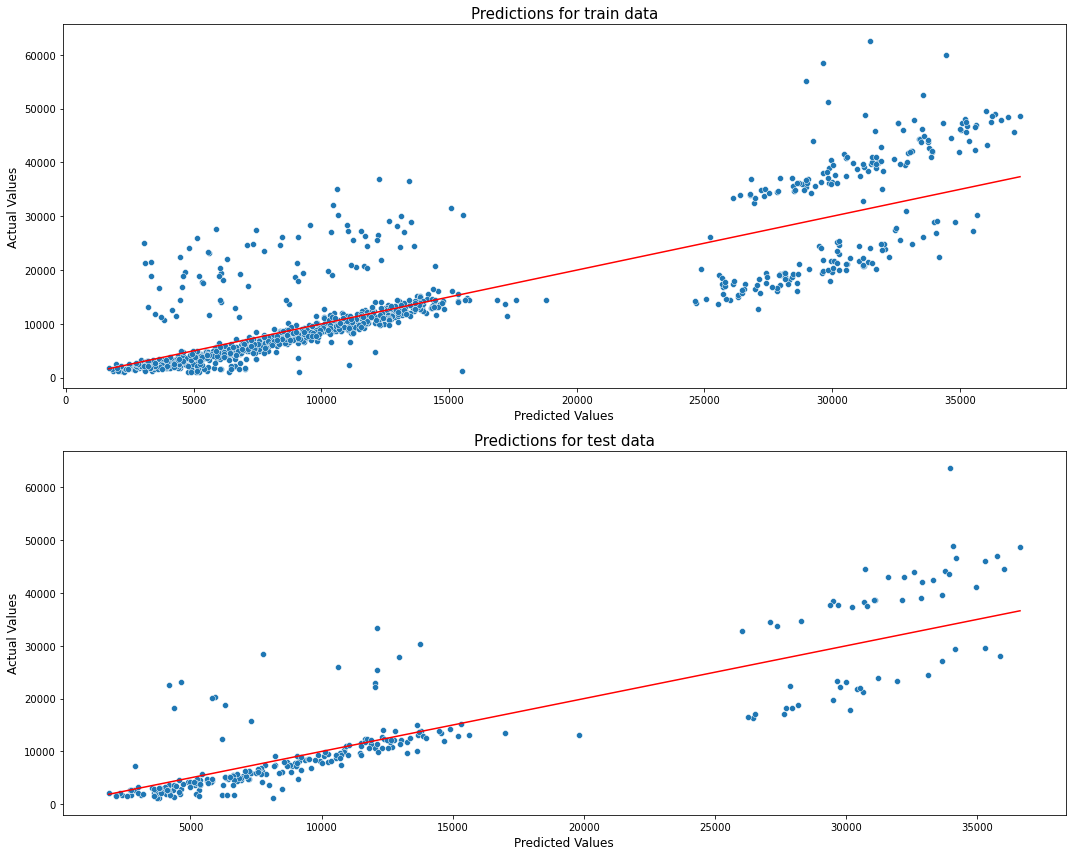

In [118]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model13.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model13.predict(X_train).reshape(-1), model13.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred13.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred13.reshape(-1), y_pred13.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [137]:
check_min_max(y_pred13)

Predicted values

max: 36639.53125
min: 1879.7998046875

Actual values

max: 63770.42801
min: 1131.5066


In [121]:
# the r2 score has slightly decreased
# and it ran for twice as many epocs
# maybe weight initialization should be kept afterall 
# lets try another arch
# lets try one with lesser layers (similar to model 9)

In [140]:
model14 = Sequential()

model14.add(Dense(500, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model14.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model14.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model14.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model14.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model14.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model14.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model14.compile(loss='mse', optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [141]:
history14 = model14.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 56ms/step - loss: 325408480.0000 - mse: 325408480.0000 - mae: 13516.4746 - val_loss: 309988160.0000 - val_mse: 309988160.0000 - val_mae: 12641.7812
Epoch 2/300
14/14 [==============================] - 0s 20ms/step - loss: 322162624.0000 - mse: 322162624.0000 - mae: 13401.9443 - val_loss: 296703584.0000 - val_mse: 296703584.0000 - val_mae: 12150.3076
Epoch 3/300
14/14 [==============================] - 0s 29ms/step - loss: 261771008.0000 - mse: 261771008.0000 - mae: 11126.2275 - val_loss: 148549728.0000 - val_mse: 148549728.0000 - val_mae: 7143.3818
Epoch 4/300
14/14 [==============================] - 0s 26ms/step - loss: 138104816.0000 - mse: 138104816.0000 - mae: 9719.1992 - val_loss: 130395960.0000 - val_mse: 130395960.0000 - val_mae: 8394.4648
Epoch 5/300
14/14 [==============================] - 0s 30ms/step - loss: 130065864.0000 - mse: 130065864.0000 - mae: 8604.7510 - val_loss: 130807328.0000 - val_mse: 130807328.0000 - val_

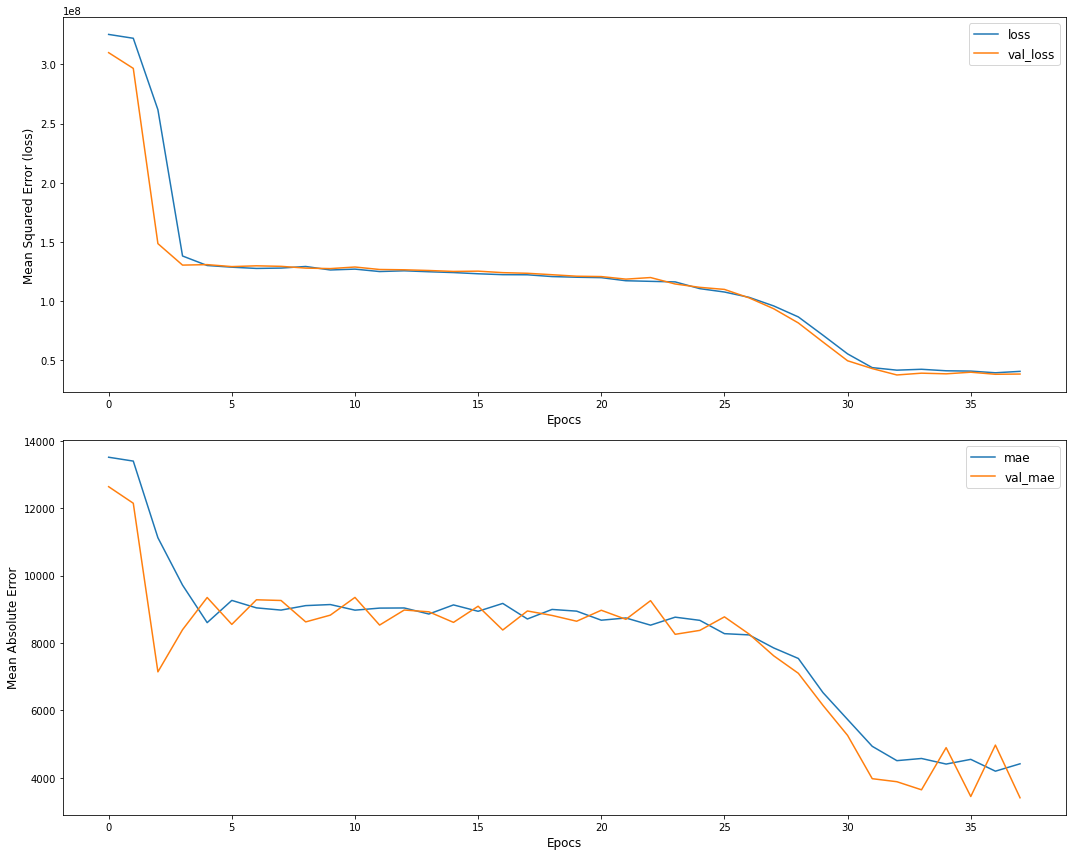

In [191]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history14.history['loss'], label='loss')
axs[0].plot(history14.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Squared Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history14.history['mae'], label='mae')
axs[1].plot(history14.history['val_mae'], label='val_mae')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [143]:
y_pred14 = model14.predict(X_test)
r2_score(y_test, y_pred14) 

0.7682695748999365

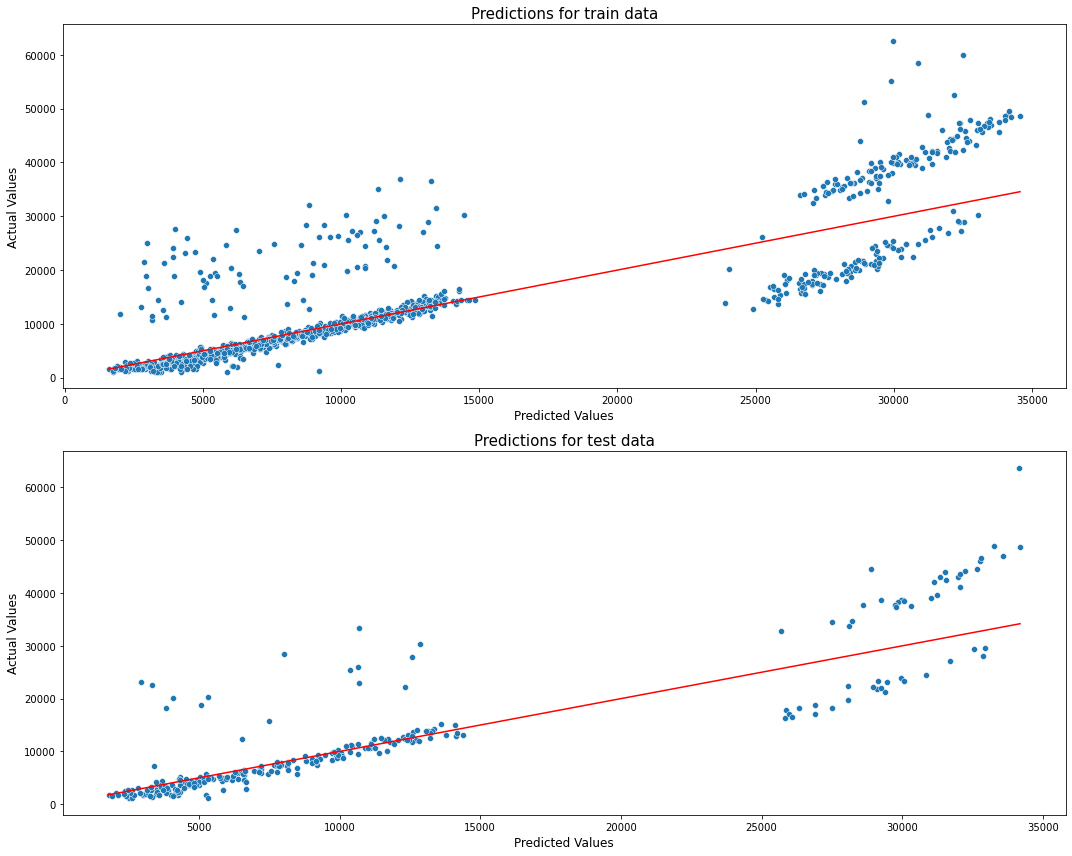

In [144]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model14.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model14.predict(X_train).reshape(-1), model14.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred14.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred14.reshape(-1), y_pred14.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [145]:
check_min_max(y_pred14)

Predicted values

max: 34188.03125
min: 1793.77392578125

Actual values

max: 63770.42801
min: 1131.5066


In [147]:
# compared to model9, this model performs extremly poorly
# but it performs slightly worse even when compared to the last two models 
# lets increase the neuron count in each layers of this NN arch 

In [151]:
model15 = Sequential()

model15.add(Dense(1000, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model15.add(Dense(750, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model15.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model15.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model15.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model15.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model15.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model15.compile(loss='mse', optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [152]:
history15 = model15.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 84ms/step - loss: 323155104.0000 - mse: 323155104.0000 - mae: 13437.2441 - val_loss: 295130304.0000 - val_mse: 295130304.0000 - val_mae: 12090.2998
Epoch 2/300
14/14 [==============================] - 1s 54ms/step - loss: 226581152.0000 - mse: 226581152.0000 - mae: 10386.8018 - val_loss: 179884240.0000 - val_mse: 179884240.0000 - val_mae: 12360.0420
Epoch 3/300
14/14 [==============================] - 1s 54ms/step - loss: 147230128.0000 - mse: 147230128.0000 - mae: 8950.5791 - val_loss: 137429392.0000 - val_mse: 137429392.0000 - val_mae: 7516.1299
Epoch 4/300
14/14 [==============================] - 1s 55ms/step - loss: 134454880.0000 - mse: 134454880.0000 - mae: 9429.8555 - val_loss: 131682752.0000 - val_mse: 131682752.0000 - val_mae: 8027.9165
Epoch 5/300
14/14 [==============================] - 1s 77ms/step - loss: 130443392.0000 - mse: 130443392.0000 - mae: 8640.1748 - val_loss: 131164352.0000 - val_mse: 131164352.0000 - val_m

Epoch 42/300
14/14 [==============================] - 1s 57ms/step - loss: 36356900.0000 - mse: 36356900.0000 - mae: 4072.6174 - val_loss: 35432556.0000 - val_mse: 35432556.0000 - val_mae: 3150.1663
Epoch 43/300
14/14 [==============================] - 1s 53ms/step - loss: 35832940.0000 - mse: 35832940.0000 - mae: 4028.5864 - val_loss: 34743792.0000 - val_mse: 34743792.0000 - val_mae: 3154.5427
Epoch 44/300
14/14 [==============================] - 1s 55ms/step - loss: 37094060.0000 - mse: 37094060.0000 - mae: 3864.8228 - val_loss: 32359892.0000 - val_mse: 32359892.0000 - val_mae: 3927.0339
Epoch 45/300
14/14 [==============================] - 1s 62ms/step - loss: 37190576.0000 - mse: 37190576.0000 - mae: 4227.4468 - val_loss: 32132580.0000 - val_mse: 32132580.0000 - val_mae: 3721.0952
Epoch 46/300
14/14 [==============================] - 1s 64ms/step - loss: 36529080.0000 - mse: 36529080.0000 - mae: 3879.3352 - val_loss: 32601950.0000 - val_mse: 32601950.0000 - val_mae: 3622.9280
Epoch

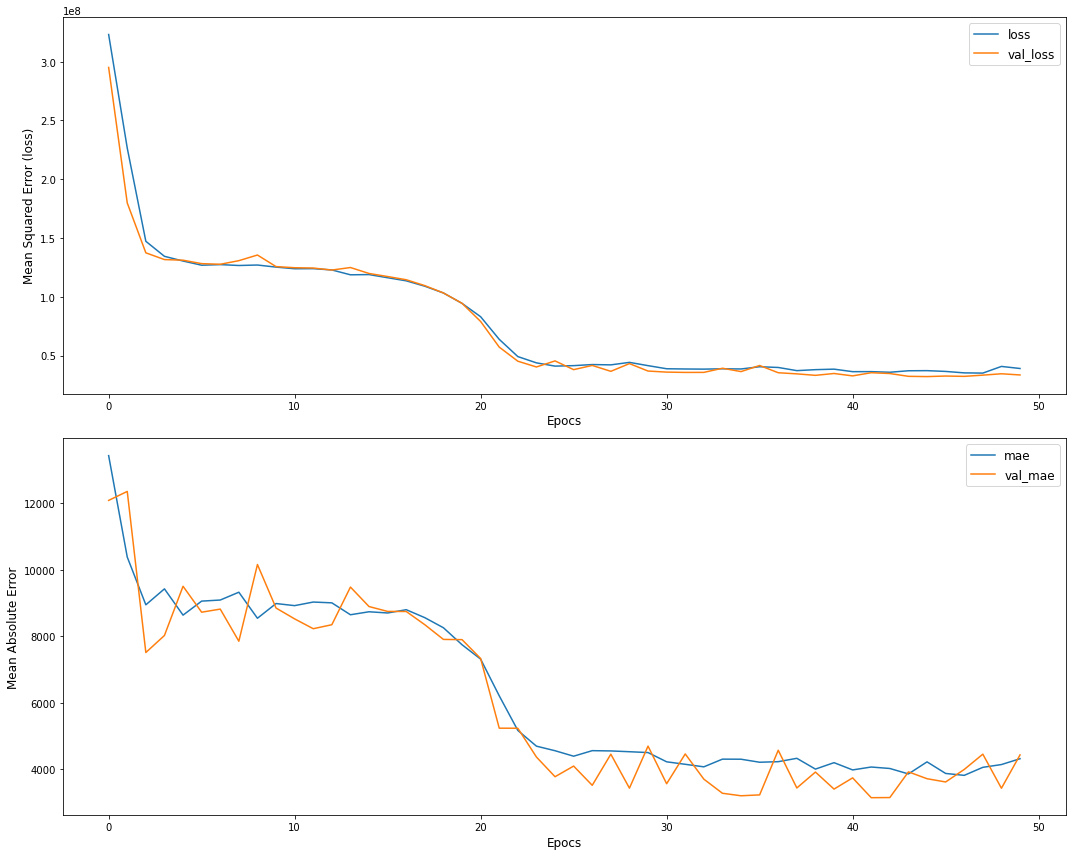

In [192]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history15.history['loss'], label='loss')
axs[0].plot(history15.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Squared Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history15.history['mae'], label='mae')
axs[1].plot(history15.history['val_mae'], label='val_mae')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [154]:
y_pred15 = model15.predict(X_test)
r2_score(y_test, y_pred15) 

0.7830456303216067

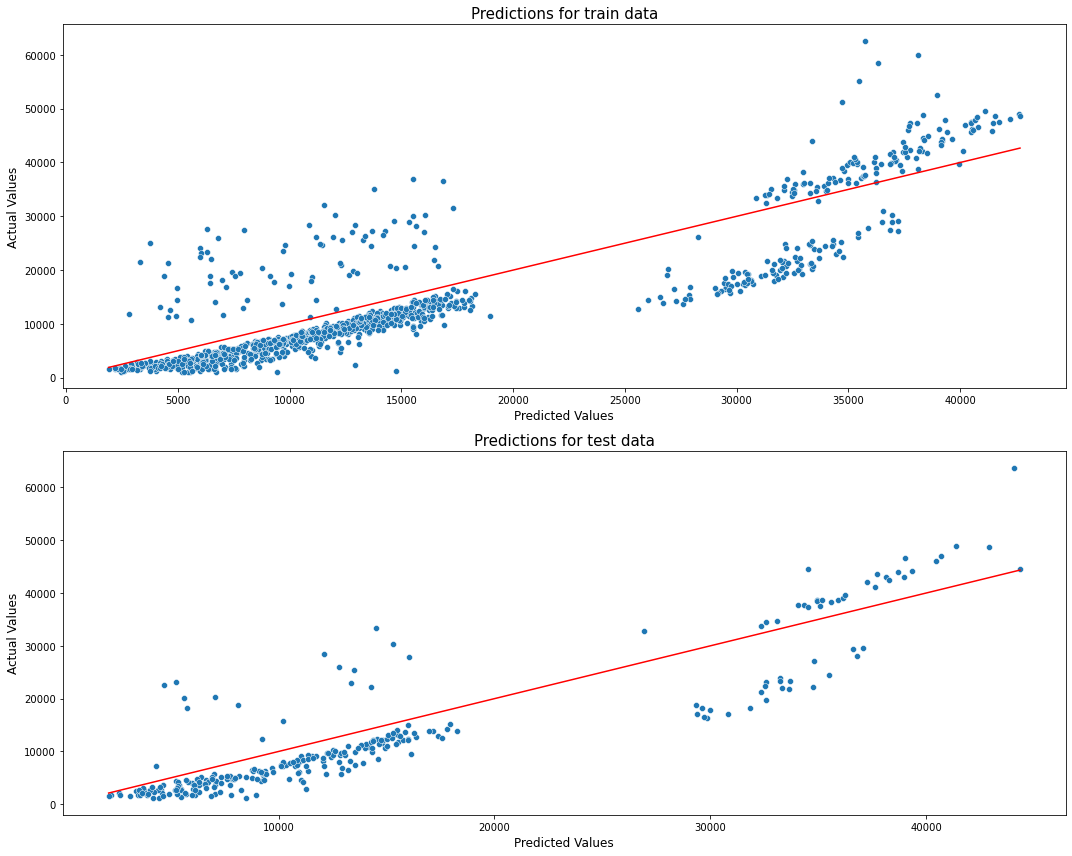

In [155]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model15.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model15.predict(X_train).reshape(-1), model15.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred15.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred15.reshape(-1), y_pred15.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [160]:
check_min_max(y_pred15)

Predicted values

max: 44353.5625
min: 2121.5205078125

Actual values

max: 63770.42801
min: 1131.5066


In [169]:
# the r2 score is slightly improved but the max value increased to 44k
# that being said the total parameter count between model 15 
# and models 12-14 is of the order 10 (check model.summary())
# but the param count is almost the same as model 11
# but the loss param for model 11 was MAE instead 
# but model 11 performed extremely well compared 
# lets try the model 11 arch for MSE 

In [177]:
model16 = Sequential()

model16.add(Dense(500, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model16.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model16.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model16.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model16.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model16.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model16.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))


model16.compile(loss='mse', optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [178]:
history16 = model16.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 85ms/step - loss: 289894720.0000 - mse: 289894720.0000 - mae: 12263.8711 - val_loss: 134329712.0000 - val_mse: 134329712.0000 - val_mae: 7927.4531
Epoch 2/300
14/14 [==============================] - 1s 41ms/step - loss: 148268656.0000 - mse: 148268656.0000 - mae: 9290.4209 - val_loss: 134732224.0000 - val_mse: 134732224.0000 - val_mae: 7812.6992
Epoch 3/300
14/14 [==============================] - 1s 63ms/step - loss: 130684944.0000 - mse: 130684944.0000 - mae: 9253.5176 - val_loss: 130073552.0000 - val_mse: 130073552.0000 - val_mae: 8467.3291
Epoch 4/300
14/14 [==============================] - 1s 70ms/step - loss: 128350288.0000 - mse: 128350288.0000 - mae: 9161.3555 - val_loss: 128993024.0000 - val_mse: 128993024.0000 - val_mae: 8866.8428
Epoch 5/300
14/14 [==============================] - ETA: 0s - loss: 127581480.0000 - mse: 127581480.0000 - mae: 8873.10 - 1s 63ms/step - loss: 127581480.0000 - mse: 127581480.0000 - mae: 887

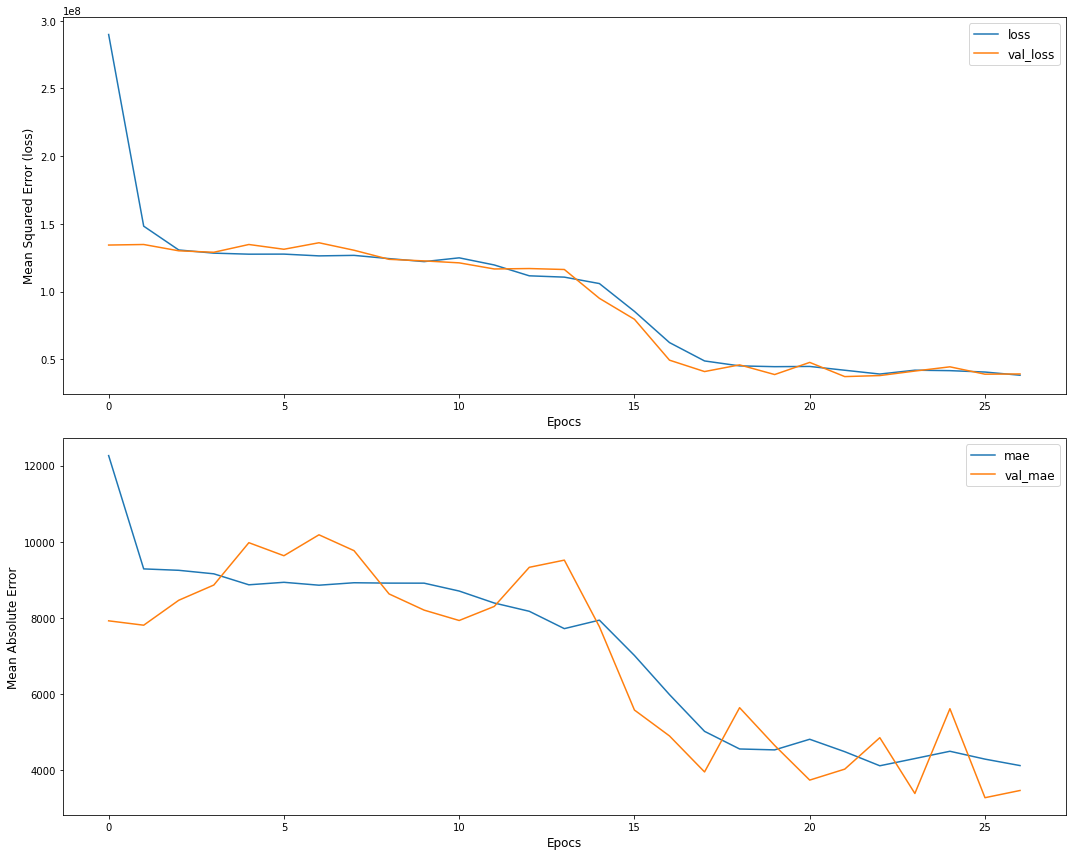

In [193]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history16.history['loss'], label='loss')
axs[0].plot(history16.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Squared Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history16.history['mae'], label='mae')
axs[1].plot(history16.history['val_mae'], label='val_mae')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [180]:
y_pred16 = model16.predict(X_test)
r2_score(y_test, y_pred16) 

0.7663524061806247

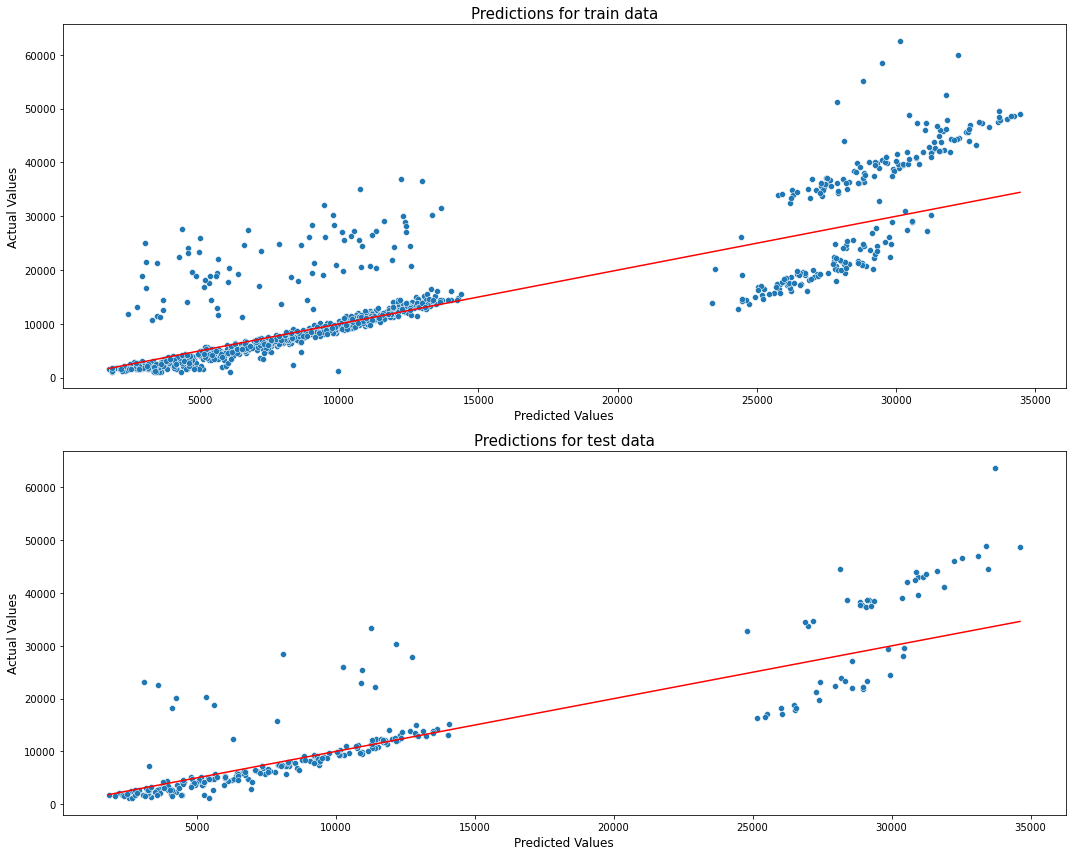

In [181]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model16.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model16.predict(X_train).reshape(-1), model16.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred16.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred16.reshape(-1), y_pred16.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [182]:
check_min_max(y_pred16)

Predicted values

max: 34621.57421875
min: 1829.38720703125

Actual values

max: 63770.42801
min: 1131.5066


In [187]:
# model15 performs better than model16
# but model11, with same param count,
# performs extremely better than both (with loss as MAE)
# lets try to train model15 with loss as MAE 

In [188]:
model17 = Sequential()

model17.add(Dense(1000, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model17.add(Dense(750, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model17.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model17.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model17.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model17.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model17.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model17.compile(loss='mae', optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [194]:
history17 = model17.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 96ms/step - loss: 13481.3428 - mse: 324409408.0000 - mae: 13481.3428 - val_loss: 12381.0820 - val_mse: 302869184.0000 - val_mae: 12381.0820
Epoch 2/300
14/14 [==============================] - 1s 45ms/step - loss: 10995.4951 - mse: 258566640.0000 - mae: 10995.4951 - val_loss: 8250.9795 - val_mse: 131481224.0000 - val_mae: 8250.9795
Epoch 3/300
14/14 [==============================] - 1s 44ms/step - loss: 8038.6279 - mse: 159164992.0000 - mae: 8038.6279 - val_loss: 6996.1938 - val_mse: 154765872.0000 - val_mae: 6996.1938
Epoch 4/300
14/14 [==============================] - 1s 64ms/step - loss: 7436.8154 - mse: 152597424.0000 - mae: 7436.8154 - val_loss: 6874.7988 - val_mse: 156533488.0000 - val_mae: 6874.7988
Epoch 5/300
14/14 [==============================] - 1s 50ms/step - loss: 7266.0142 - mse: 155421264.0000 - mae: 7266.0142 - val_loss: 6726.2866 - val_mse: 154220528.0000 - val_mae: 6726.2866
Epoch 6/300
14/14 [===============

Epoch 44/300
14/14 [==============================] - 1s 36ms/step - loss: 3316.2588 - mse: 42865148.0000 - mae: 3316.2588 - val_loss: 3014.7324 - val_mse: 33281742.0000 - val_mae: 3014.7324
Epoch 45/300
14/14 [==============================] - 0s 34ms/step - loss: 3318.8494 - mse: 40941980.0000 - mae: 3318.8494 - val_loss: 2850.6746 - val_mse: 33170310.0000 - val_mae: 2850.6746
Epoch 46/300
14/14 [==============================] - 0s 35ms/step - loss: 3438.6975 - mse: 43944016.0000 - mae: 3438.6975 - val_loss: 2866.6011 - val_mse: 33250696.0000 - val_mae: 2866.6011


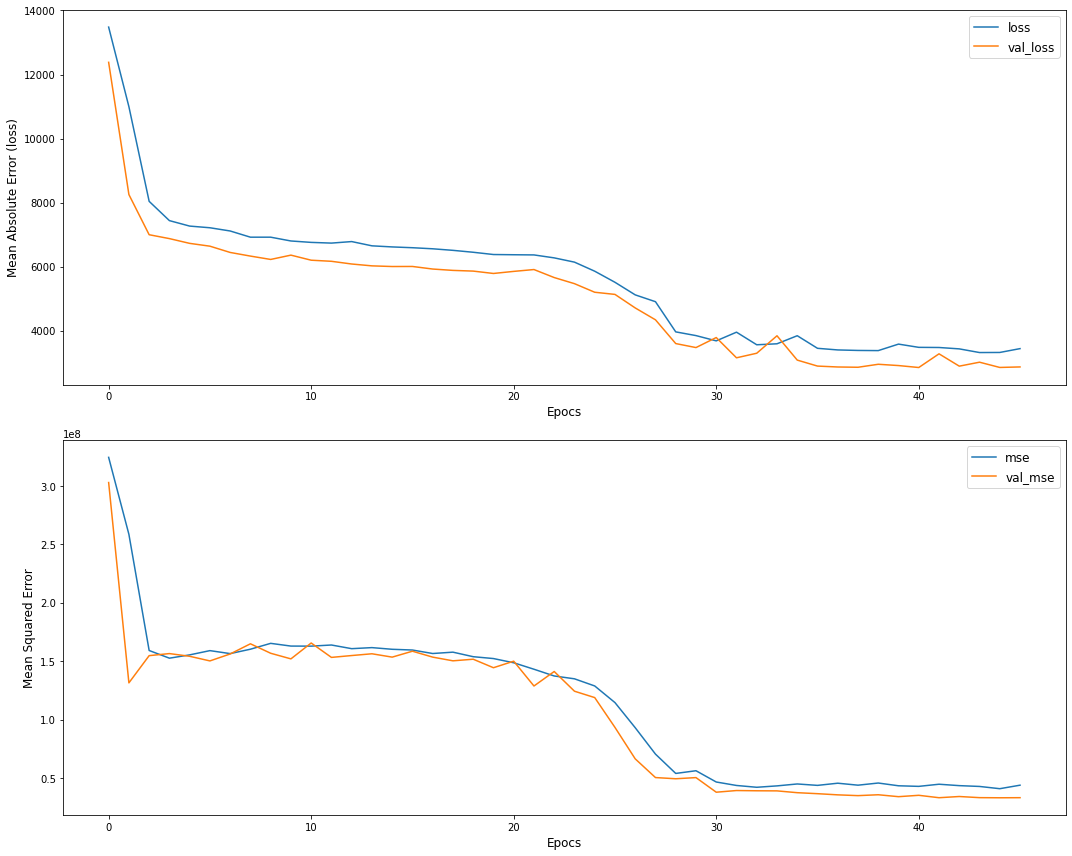

In [195]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history17.history['loss'], label='loss')
axs[0].plot(history17.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history17.history['mse'], label='mse')
axs[1].plot(history17.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [196]:
y_pred17 = model17.predict(X_test)
r2_score(y_test, y_pred17) 

0.7945839254627138

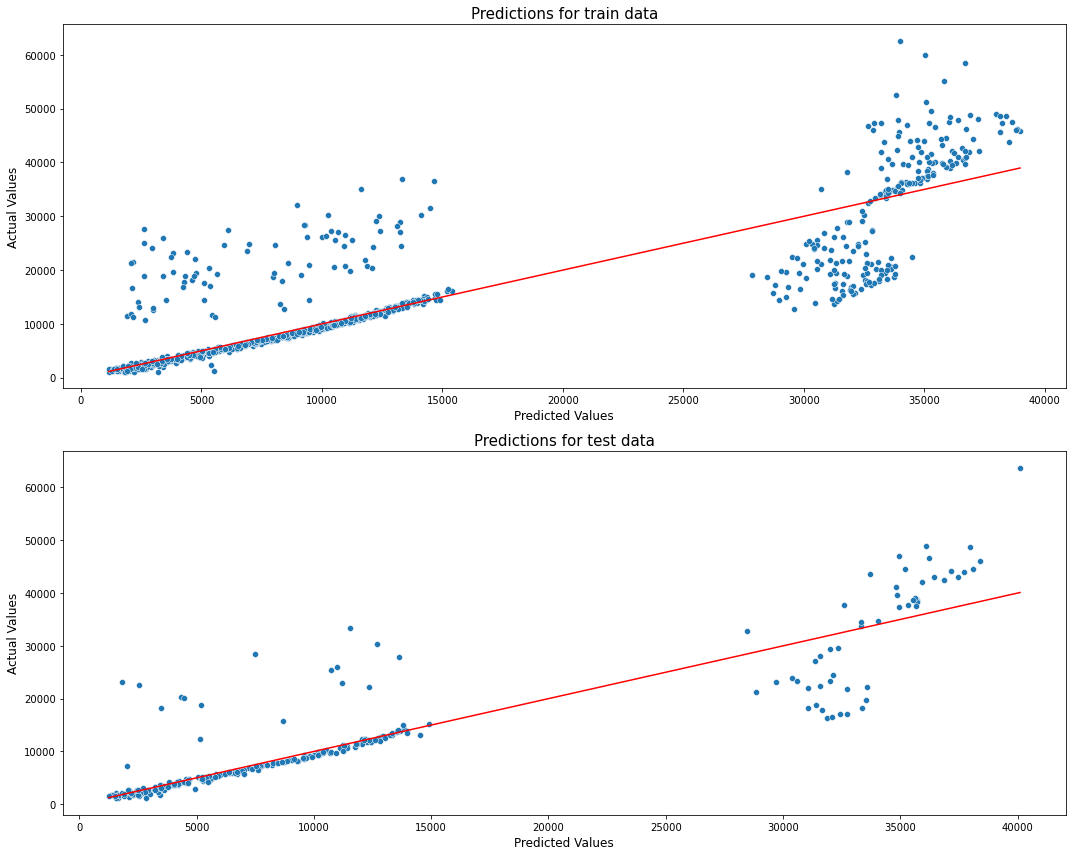

In [197]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model17.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model17.predict(X_train).reshape(-1), model17.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred17.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred17.reshape(-1), y_pred17.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [198]:
check_min_max(y_pred17)

Predicted values

max: 40099.0390625
min: 1254.55517578125

Actual values

max: 63770.42801
min: 1131.5066


In [201]:
# r2 score is slightly better than model 15
# but the prediction is more accurate for charges around less than 15k
# ...?
# training the same arch as model11 but with weights init  

In [202]:
model18 = Sequential()

model18.add(Dense(500, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model18.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model18.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model18.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model18.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model18.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model18.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))


model18.compile(loss='mae', optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [203]:
history18 = model18.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 102ms/step - loss: 12392.7783 - mse: 295126400.0000 - mae: 12392.7783 - val_loss: 7316.3423 - val_mse: 141357184.0000 - val_mae: 7316.3423
Epoch 2/300
14/14 [==============================] - 1s 48ms/step - loss: 8143.3569 - mse: 162351888.0000 - mae: 8143.3569 - val_loss: 6932.6738 - val_mse: 153422016.0000 - val_mae: 6932.6738
Epoch 3/300
14/14 [==============================] - 1s 49ms/step - loss: 7612.6665 - mse: 158039376.0000 - mae: 7612.6665 - val_loss: 6840.3604 - val_mse: 148615536.0000 - val_mae: 6840.3604
Epoch 4/300
14/14 [==============================] - 1s 77ms/step - loss: 7213.2163 - mse: 155370624.0000 - mae: 7213.2163 - val_loss: 6571.6289 - val_mse: 159712240.0000 - val_mae: 6571.6289
Epoch 5/300
14/14 [==============================] - 1s 49ms/step - loss: 6985.9839 - mse: 162019904.0000 - mae: 6985.9839 - val_loss: 6302.6558 - val_mse: 157666896.0000 - val_mae: 6302.6558
Epoch 6/300
14/14 [==================

Epoch 44/300
14/14 [==============================] - 1s 37ms/step - loss: 3009.8496 - mse: 38172804.0000 - mae: 3009.8496 - val_loss: 2550.3604 - val_mse: 29810930.0000 - val_mae: 2550.3604
Epoch 45/300
14/14 [==============================] - 0s 35ms/step - loss: 2870.7056 - mse: 37065108.0000 - mae: 2870.7056 - val_loss: 2621.3250 - val_mse: 32190172.0000 - val_mae: 2621.3250
Epoch 46/300
14/14 [==============================] - 0s 34ms/step - loss: 2949.9167 - mse: 37276044.0000 - mae: 2949.9167 - val_loss: 2782.7803 - val_mse: 28515854.0000 - val_mae: 2782.7803


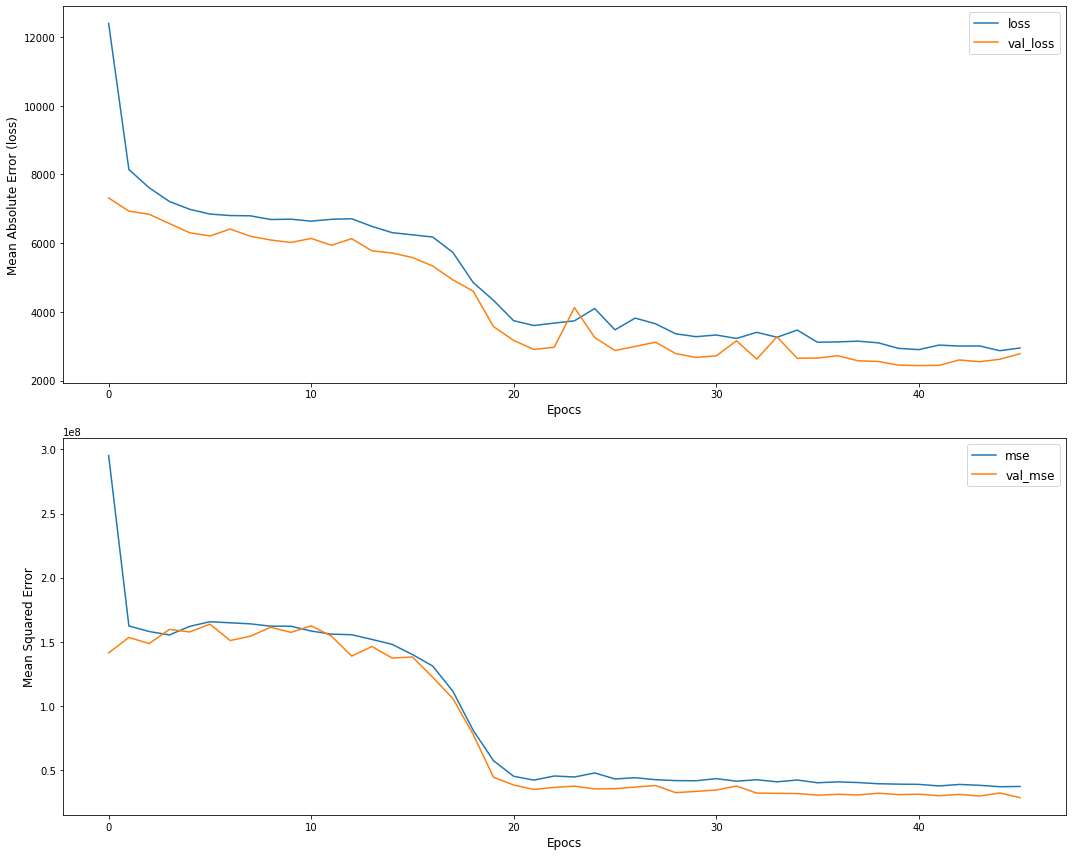

In [204]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history18.history['loss'], label='loss')
axs[0].plot(history18.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history18.history['mse'], label='mse')
axs[1].plot(history18.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [205]:
y_pred18 = model18.predict(X_test)
r2_score(y_test, y_pred18) 

0.8323962958106431

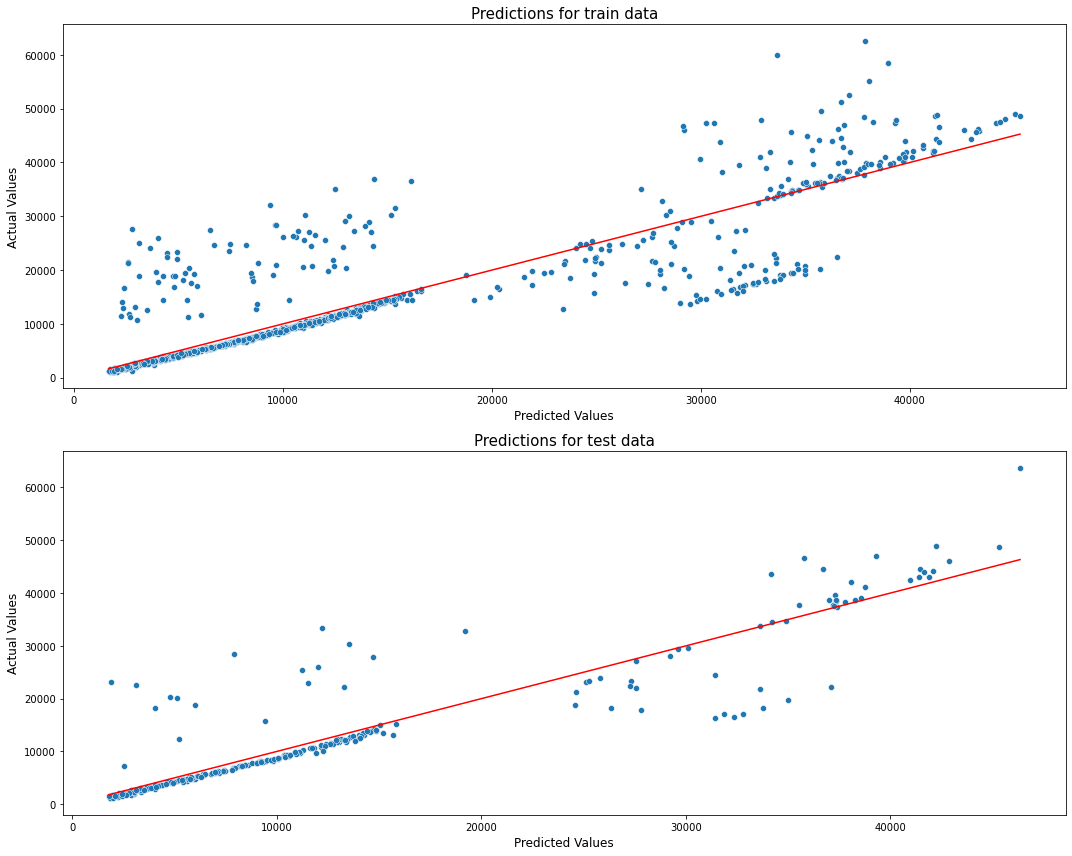

In [206]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model18.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model18.predict(X_train).reshape(-1), model18.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred18.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred18.reshape(-1), y_pred18.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [207]:
check_min_max(y_pred18)

Predicted values

max: 46334.7265625
min: 1780.11376953125

Actual values

max: 63770.42801
min: 1131.5066


In [209]:
# slightly lower r2 score than model11 (probably cuz of epoch count)
# manual weights init does not seem that important 
# for this specific NN arch

In [237]:
# training model15 but with loss as MAE

In [239]:
model19 = Sequential()

model19.add(Dense(1000, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model19.add(Dense(750, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model19.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model19.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model19.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model19.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model19.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model19.compile(loss='mae', optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [240]:
history19 = model19.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 91ms/step - loss: 13460.1709 - mse: 323817632.0000 - mae: 13460.1709 - val_loss: 12242.0381 - val_mse: 299167328.0000 - val_mae: 12242.0381
Epoch 2/300
14/14 [==============================] - 1s 46ms/step - loss: 10475.5762 - mse: 237199440.0000 - mae: 10475.5762 - val_loss: 8772.2666 - val_mse: 130518952.0000 - val_mae: 8772.2666
Epoch 3/300
14/14 [==============================] - 1s 64ms/step - loss: 8031.2720 - mse: 163053344.0000 - mae: 8031.2720 - val_loss: 7046.2891 - val_mse: 148944240.0000 - val_mae: 7046.2891
Epoch 4/300
14/14 [==============================] - 1s 57ms/step - loss: 7591.8701 - mse: 154553648.0000 - mae: 7591.8701 - val_loss: 6904.7178 - val_mse: 154128864.0000 - val_mae: 6904.7178
Epoch 5/300
14/14 [==============================] - 1s 90ms/step - loss: 7355.8433 - mse: 155487072.0000 - mae: 7355.8433 - val_loss: 6809.2705 - val_mse: 159863408.0000 - val_mae: 6809.2705
Epoch 6/300
14/14 [===============

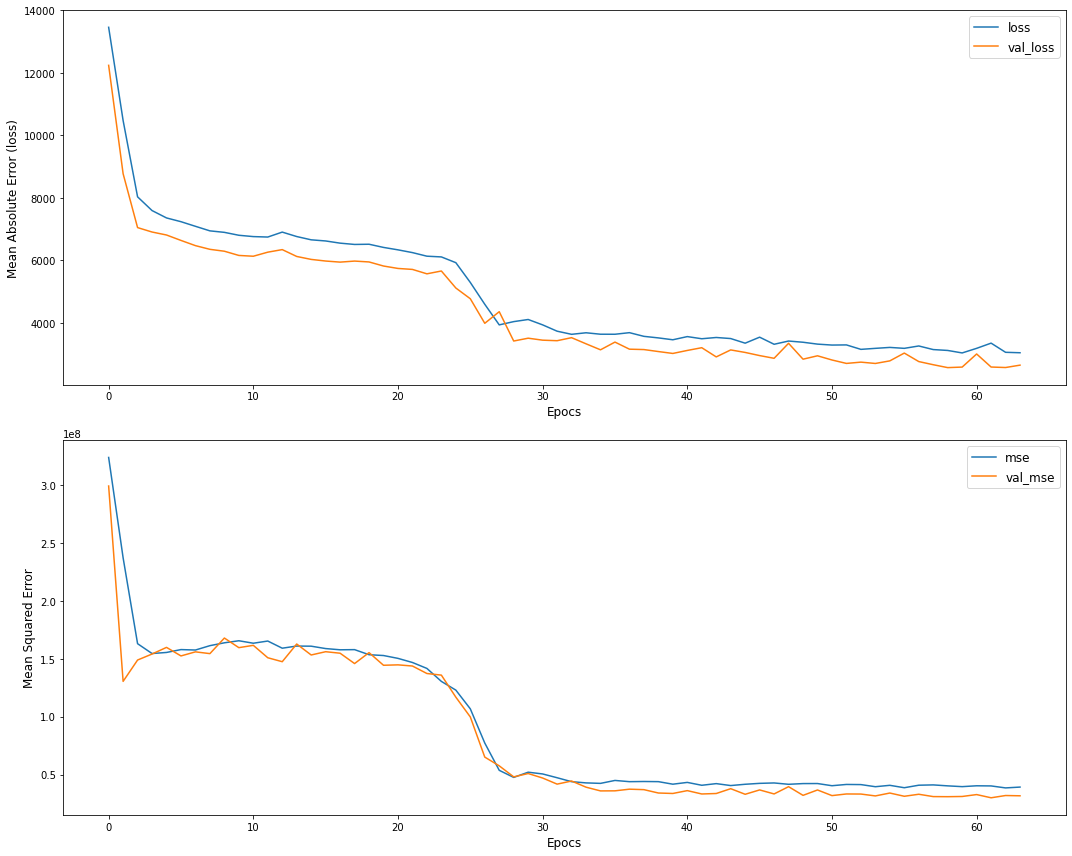

In [241]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
axs[0].plot(history19.history['loss'], label='loss')
axs[0].plot(history19.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Mean Absolute Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history19.history['mse'], label='mse')
axs[1].plot(history19.history['val_mse'], label='val_mse')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Squared Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)


plt.tight_layout()

In [242]:
y_pred19 = model19.predict(X_test)
r2_score(y_test, y_pred19) 

0.8132271905135318

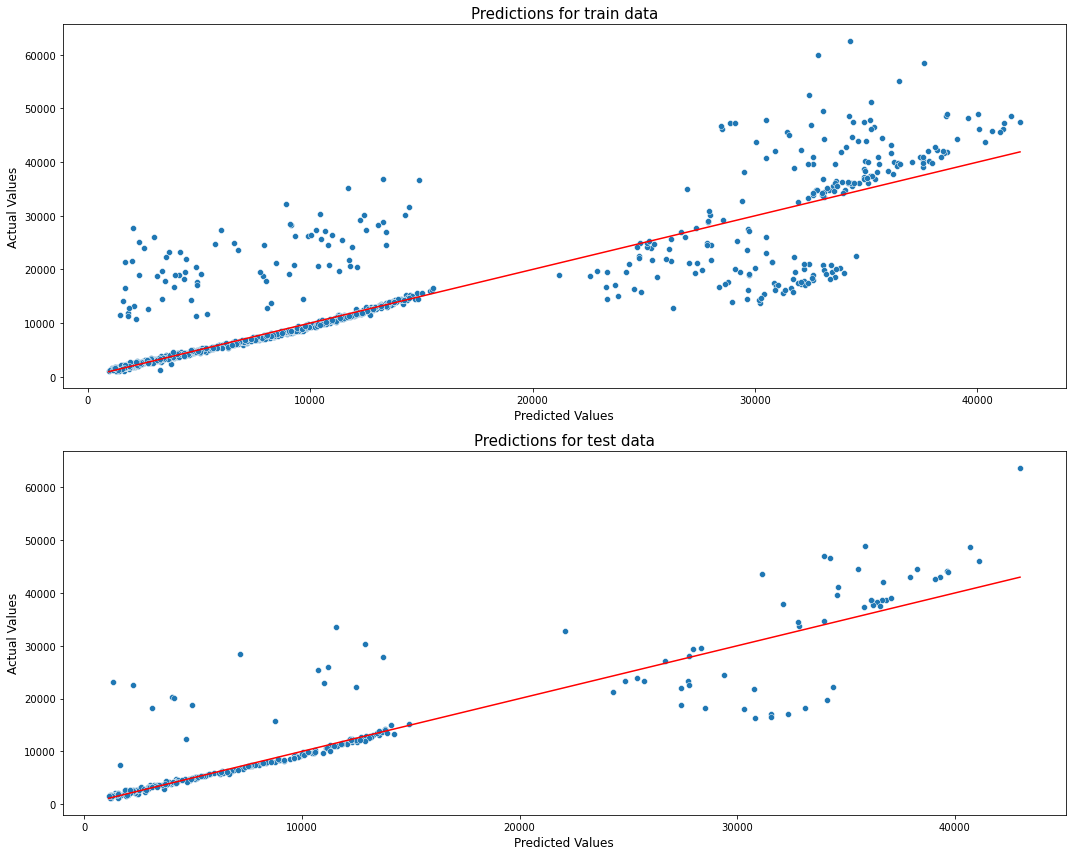

In [243]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model19.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model19.predict(X_train).reshape(-1), model19.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred19.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred19.reshape(-1), y_pred19.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [244]:
check_min_max(y_pred19)

Predicted values

max: 43001.73828125
min: 1115.58251953125

Actual values

max: 63770.42801
min: 1131.5066


In [246]:
# r2 score better than model15 
# I've noticed that the r2 score is higher for loss as mae
# but mse should be a better determinant for loss 
# so now I'm going to start using rmse as loss 

In [275]:
# fun fact: rmse is not an inbuilt loss function in keras [at least to my knowledge]
# so had to manually define the loss function (thanks stackoverflow!)

In [276]:
# from tensorflow.keras.metrics import RootMeanSquaredError
# tried this as loss function, but it is not working

In [265]:
from tensorflow.keras.backend import sqrt as Ksqrt
from tensorflow.keras.backend import mean as Kmean
from tensorflow.keras.backend import square as Ksquare

In [266]:
# copied from stackoverflow

def root_mean_squared_error(y_true, y_pred):
        return Ksqrt(Kmean(Ksquare(y_pred - y_true))) 

In [251]:
# training model19 for rmse loss function 

In [279]:
model20 = Sequential()

model20.add(Dense(1000, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model20.add(Dense(750, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model20.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model20.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model20.add(Dense(100, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model20.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model20.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model20.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [280]:
history20 = model20.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 75ms/step - loss: 17882.2969 - mse: 325276000.0000 - mae: 13511.7812 - val_loss: 17542.9082 - val_mse: 308589696.0000 - val_mae: 12590.7432
Epoch 2/300
14/14 [==============================] - 1s 43ms/step - loss: 17004.0449 - mse: 296356640.0000 - mae: 12411.3408 - val_loss: 13556.5059 - val_mse: 184376304.0000 - val_mae: 7777.1572
Epoch 3/300
14/14 [==============================] - 1s 44ms/step - loss: 11865.0361 - mse: 141968352.0000 - mae: 9353.5107 - val_loss: 11663.4062 - val_mse: 136421792.0000 - val_mae: 7609.8594
Epoch 4/300
14/14 [==============================] - 1s 42ms/step - loss: 11536.0645 - mse: 134121296.0000 - mae: 9204.0957 - val_loss: 11439.3643 - val_mse: 131197288.0000 - val_mae: 8117.4409
Epoch 5/300
14/14 [==============================] - 1s 48ms/step - loss: 11300.3203 - mse: 132103216.0000 - mae: 8584.7969 - val_loss: 11509.8740 - val_mse: 132718288.0000 - val_mae: 9718.4766
Epoch 6/300
14/14 [========

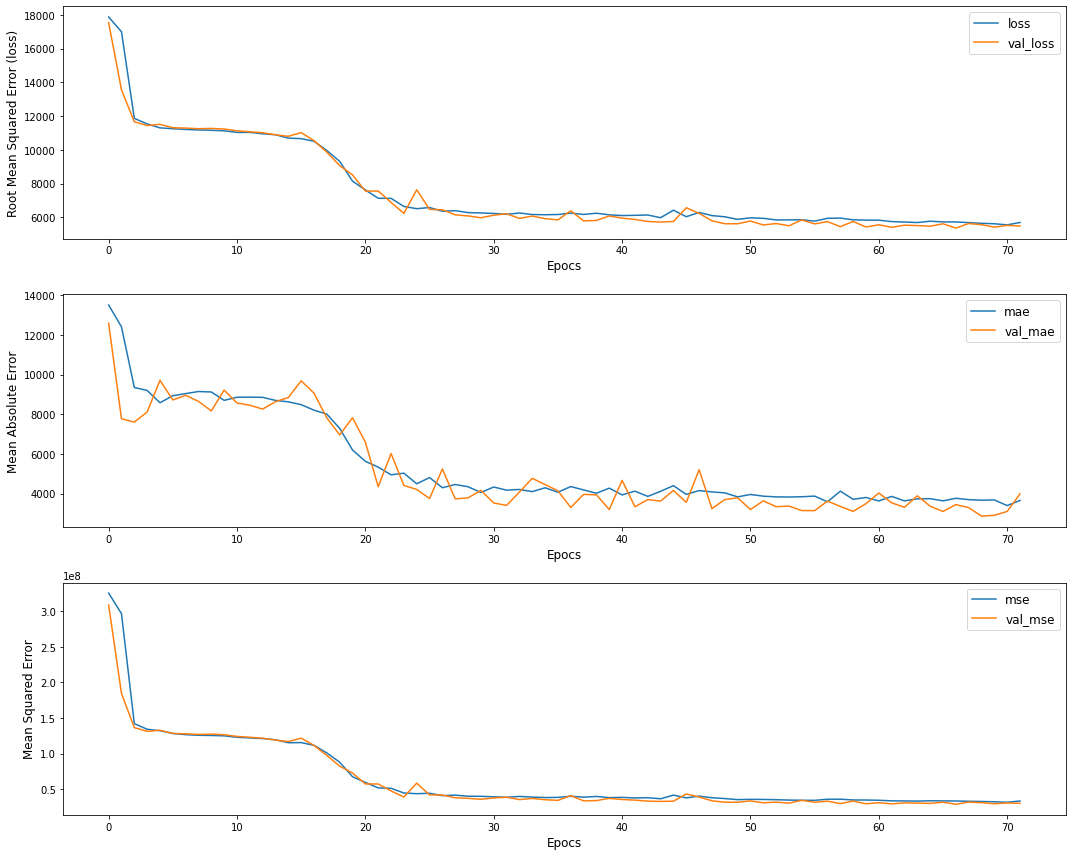

In [289]:
fig, axs = plt.subplots(3, 1, figsize=(15,12))
#1st plot
axs[0].plot(history20.history['loss'], label='loss')
axs[0].plot(history20.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epocs', fontsize=12)
axs[0].set_ylabel('Root Mean Squared Error (loss)', fontsize=12)
axs[0].legend(loc='upper right', fontsize=12)

#2nd plot 
axs[1].plot(history20.history['mae'], label='mae')
axs[1].plot(history20.history['val_mae'], label='val_mae')
axs[1].set_xlabel('Epocs', fontsize=12)
axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
axs[1].legend(loc='upper right', fontsize=12)

#3rd plot 
axs[2].plot(history20.history['mse'], label='mse')
axs[2].plot(history20.history['val_mse'], label='val_mse')
axs[2].set_xlabel('Epocs', fontsize=12)
axs[2].set_ylabel('Mean Squared Error', fontsize=12)
axs[2].legend(loc='upper right', fontsize=12)

plt.tight_layout()

In [282]:
y_pred20 = model20.predict(X_test)
r2_score(y_test, y_pred20) 

0.8053002800274609

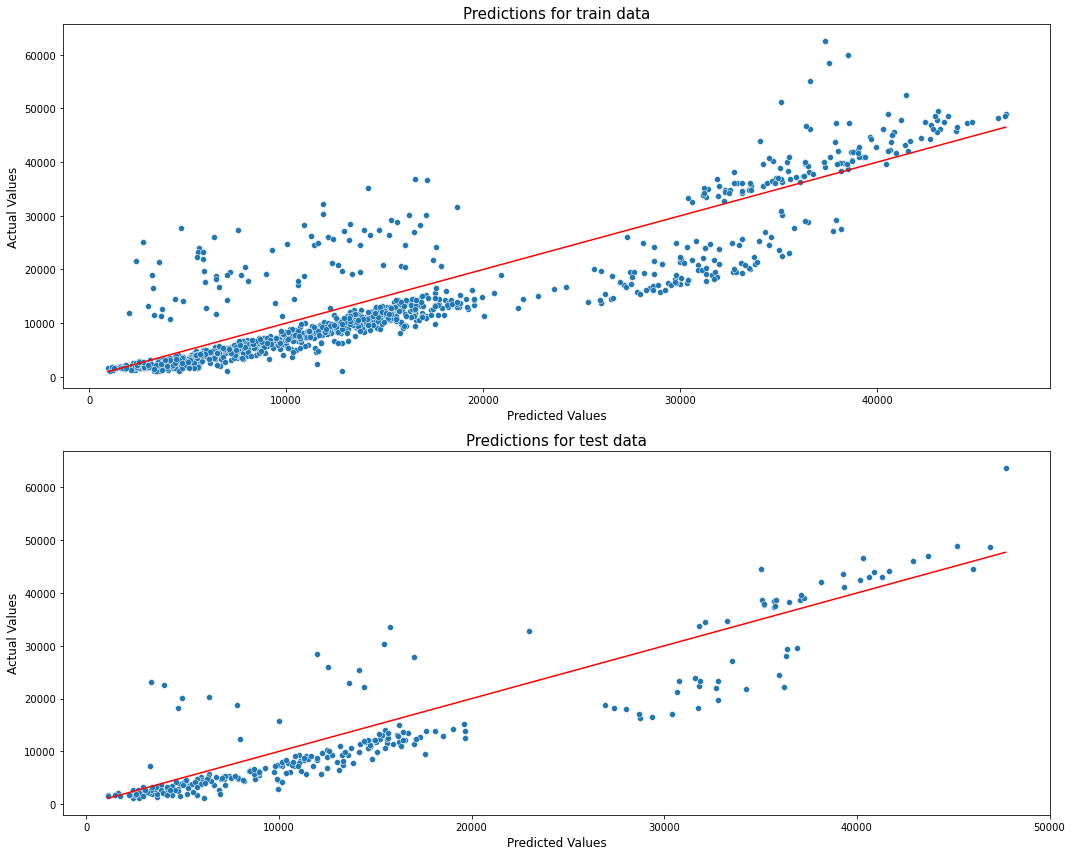

In [283]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
#1st plot
sns.scatterplot(model20.predict(X_train).reshape(-1), y_train, ax=axs[0])
axs[0].set_xlabel('Predicted Values', fontsize=12)
axs[0].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(model20.predict(X_train).reshape(-1), model20.predict(X_train).reshape(-1), color='red', ax=axs[0])
axs[0].set_title('Predictions for train data', fontsize=15)

#2nd plot 
sns.scatterplot(y_pred20.reshape(-1), y_test, ax=axs[1])
axs[1].set_xlabel('Predicted Values', fontsize=12)
axs[1].set_ylabel('Actual Values', fontsize=12)
sns.lineplot(y_pred20.reshape(-1), y_pred20.reshape(-1), color='red', ax=axs[1])
axs[1].set_title('Predictions for test data', fontsize=15)

plt.tight_layout()

In [284]:
check_min_max(y_pred20)

Predicted values

max: 47719.94140625
min: 1122.0400390625

Actual values

max: 63770.42801
min: 1131.5066


In [306]:
# model15 (MSE) r2 -> 0.783; max -> 44.3k
# model19 (MAE) r2 -> 0.813; max -> 43k
# model20 (RMSE) r2 -> 0.805; max -> 47.7k

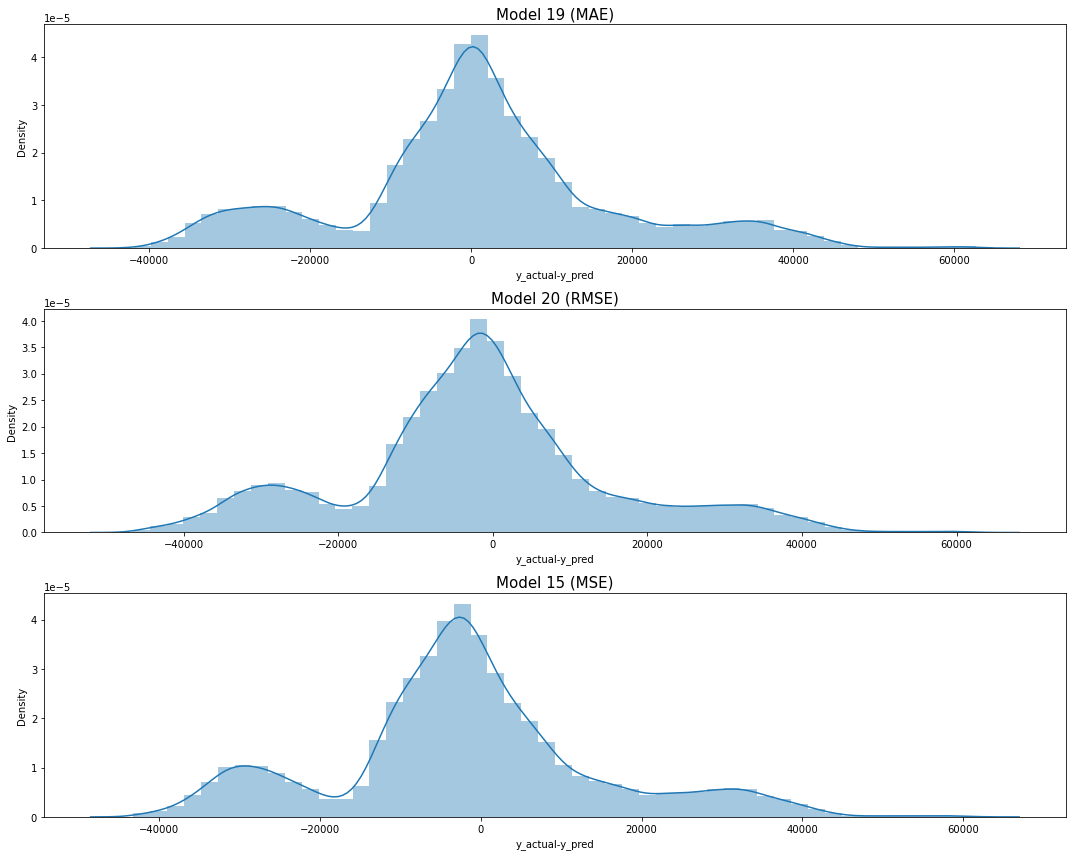

In [313]:
fig, axs = plt.subplots(3, 1, figsize=(15,12))
#1st plot
sns.distplot(np.array(y_test)-np.array(y_pred19), ax=axs[0])
axs[0].set_xlabel('y_actual-y_pred')
axs[0].set_title('Model 19 (MAE)', fontsize=15)


#2nd plot 
sns.distplot(np.array(y_test)-np.array(y_pred20), ax=axs[1])
axs[1].set_xlabel('y_actual-y_pred')
axs[1].set_title('Model 20 (RMSE)', fontsize=15)

#3rd plot 
sns.distplot(np.array(y_test)-np.array(y_pred15), ax=axs[2])
axs[2].set_xlabel('y_actual-y_pred')
axs[2].set_title('Model 15 (MSE)', fontsize=15)

plt.tight_layout()

In [315]:
# NEXT: 
# try rmse for model10  
# also try deeper NNs (similar to model10) with less neurons